In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Read in csv from Taxi.csv
df = pd.read_csv('Temp.csv')

In [76]:
# Z-normalize the data
df['value'] = (df['value'] - df['value'].mean()) / df['value'].std()

# Make the middle 20% index (0.4 to 0.6)datapoints to a sinusoid
# df['value'][int(len(df)*0.4):int(len(df)*0.6)] = np.sin(np.linspace(0, 2*np.pi, int(len(df)*0.2)))


# # Append 400 rows to the end of the dataframe with value = df.mean()
# mean = df['value'].mean()
# for i in range(400):
#     df = df.append({'value': mean}, ignore_index=True)

In [77]:
df

,timestamp,value
0,1723-01,-1.711172
1,1723-02,-1.017255
2,1723-03,-0.365393
3,1723-04,-0.071004
4,1723-05,0.517774
...,...,...
2971,1970-08,1.421969
2972,1970-09,1.085524
2973,1970-10,0.307496
2974,1970-11,-0.302310


In [78]:
window_length = int(0.1 * len(df))

In [79]:
def analyse_time_series(df, window_length):
    kurtosis_list = np.array([])
    skew_list = np.array([])
    snr_list = np.array([])
    app_entropy_list = np.array([])

    for i in range(0, len(df)-window_length):
        # Get the window
        window = df['value'][i:i+window_length]
        # Calculate the kurtosis
        kurtosis = window.kurtosis()
        # Append the kurtosis to the list
        kurtosis_list = np.append(kurtosis_list, kurtosis)
        # Calculate the skew
        skew = window.skew()
        # Append the skew to the list
        skew_list = np.append(skew_list, skew)
        # Calculate the signal to noise ratio
        snr = window.mean() / window.std()
        snr = snr**2
        # Append the snr to the list
        snr_list = np.append(snr_list, snr)


    # Scale the snr_list to fit between -3 and 3
    snr_list = (snr_list - np.min(snr_list)) / (np.max(snr_list) - np.min(snr_list))
    snr_list = snr_list * 6 - 3

    
    plt.figure(figsize=(15, 5))
    # Cap the y-axis to have range of time series
    plt.plot(df['value'], label='Time Series')
    # plt.plot(kurtosis_list, label='Kurtosis')
    # plt.plot(skew_list, label='Skew')


    # Plot a smoothed version of the snr_list
    plt.plot(np.convolve(snr_list, np.ones((window_length,))/window_length, mode='same'), label='SNR')
    plt.legend()

    return kurtosis_list, skew_list, snr_list




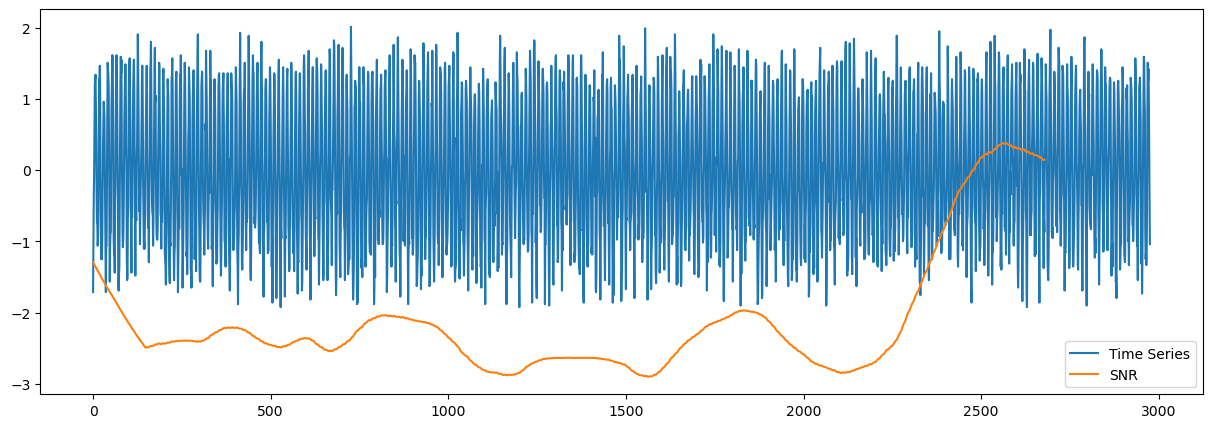

In [80]:
kurtosis_list, skew_list, snr_list = analyse_time_series(df, window_length)

In [81]:
print(snr_list)

[-1.96636291 -1.64664411 -1.54160362 ... -0.73963098 -0.27970835
 -0.16393019]


In [82]:
snr_list += 3

In [83]:
print(snr_list)

[1.03363709 1.35335589 1.45839638 ... 2.26036902 2.72029165 2.83606981]


In [84]:
# Find total area under the curve
total_area = np.trapz(snr_list)

# Find partitions in the snr_list such that area under the curve for each partition is equal to total_area / 5
no_of_partitions = 6
partition = np.array([])
left = 0
right = 0
while right < len(snr_list):
    if np.trapz(snr_list[left:right]) > total_area / no_of_partitions:
        partition = np.append(partition, right)
        left = right
    right += 1

print(partition)

[ 660. 1353. 1963. 2461. 2562.]


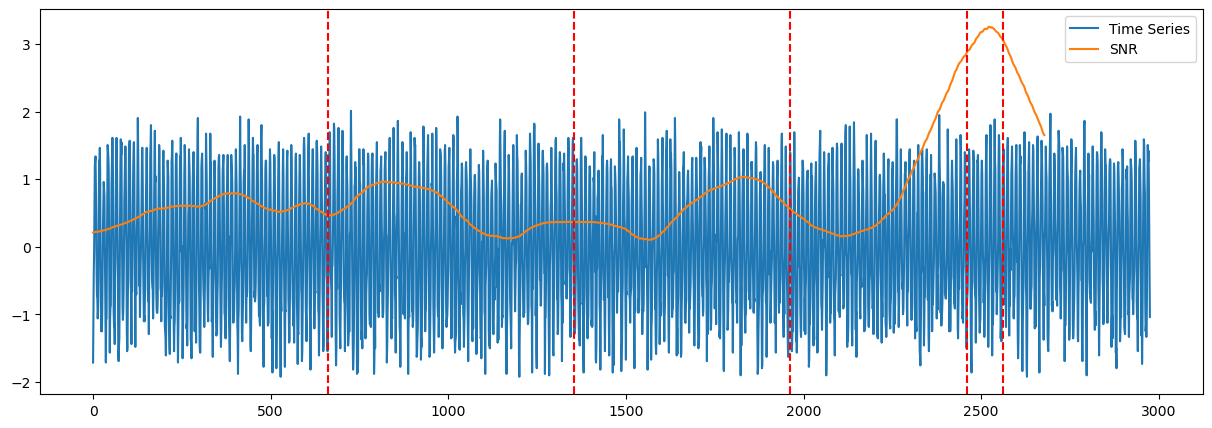

In [85]:
# Plot the partitions
plt.figure(figsize=(15, 5))
plt.plot(df['value'], label='Time Series')
plt.plot(np.convolve(snr_list, np.ones((window_length,))/window_length, mode='same'), label='SNR')
for i in range(len(partition)):
    plt.axvline(x=partition[i], color='r', linestyle='--')
plt.legend()

In [ ]:
# Generate a sine-wave with 800 datapoints
x = np.linspace(0, 2*np.pi, 800)
y = np.sin(x)

# Add some noise to the sine-wave
noise = np.random.normal(0, 0.1, 800)
y += noise

# Double the frequency of the sine-wave in the middle 20% of the data
y[int(len(y)*0.4):int(len(y)*0.6)] = np.sin(x[int(len(x)*0.4):int(len(x)*0.6)] * 2)